In [1]:
# current date, for retrieving data from proper location.
year = "2024"
month = "April"
day = "29"

## Imports and initialization

In [2]:
%config Completer.use_jedi = False
import numpy as np 
from scipy.optimize import curve_fit
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
import scipy.signal
import matplotlib.ticker as ticker
from matplotlib import gridspec
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
warnings.filterwarnings("ignore", category=RuntimeWarning)
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
color2 = 'tab:blue'
color1 = 'tab:green'
markersize = 10
capsize = 5
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [3]:
import sys
sys.path.append("../..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.Constants as cs
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
import Analysis_Python_Files.CollisionalAnalysis as lac
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

In [4]:
def double_gaussian(x, a1, b1, c1, a2, b2, c2,d):
    return a1 * np.exp(-(x - b1)**2 / (2 * c1**2)) + a2 * np.exp(-(x - b2)**2 / (2 * c2**2))+d


# Today's Work

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency =  134.43443443443442


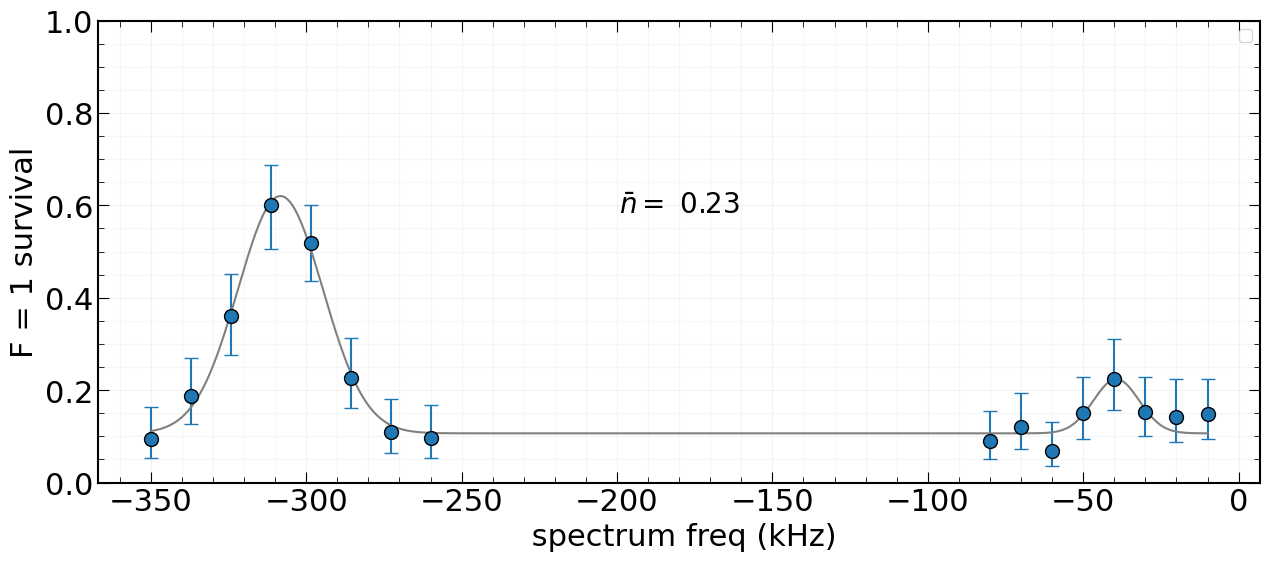

In [124]:
reloadMyModules(29,'April')
fileId = 26
dataset1 = ta.standardTransferAnalysis(fileId, tao.getStandardSurvivalOptions([2,2,3,3,1]));
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]   

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6));

x_data = key1
y_data = avgTferData1
ax.errorbar(x_data,y_data, yerr=err1,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5)

initial_guess = [0.8, -300, 20, 0.5, -50, 20,.1]
popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = double_gaussian(x_fit, *popt)

plt.plot(x_fit, y_fit, color='grey' )

# Add the text to the plot
plt.text((max(x_data) + min(x_data)) / 2, max(y_data), fr'$\bar n =$ {popt[3]/popt[0]:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=20)

ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
# plt.xlim(0,.02)
plt.ylabel('F = 1 survival')
plt.xlabel(' spectrum freq (kHz)')
plt.rcParams["axes.linewidth"] = 1.5
max_y_index = np.argmax(y_fit)
max_x_value = x_fit[max_y_index]
# print(max_x_value)

x_min = -150
x_max = 50

# Find the indices corresponding to the specified range of x values
indices = np.where((x_fit >= x_min) & (x_fit <= x_max))

# Slice the x and y arrays to include only the desired range
x_range = x_fit[indices]
y_range = y_fit[indices]
max_y_index = np.argmax(y_range)
max_x_value2 = x_range[max_y_index]
print('frequency = ', (abs(max_x_value)-abs(max_x_value2))/2)

### File 2 (3DGSBC_Top_Sideband_Spectroscopy):  

Number of Pictures: 1600; Picture Dimensions: 5 x 24
Variations: 16;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 6:56:59: on (Y-M-D) 2024-4-29, And ended at 7:3:17: on 2024-4-29
Experiment Notes:  



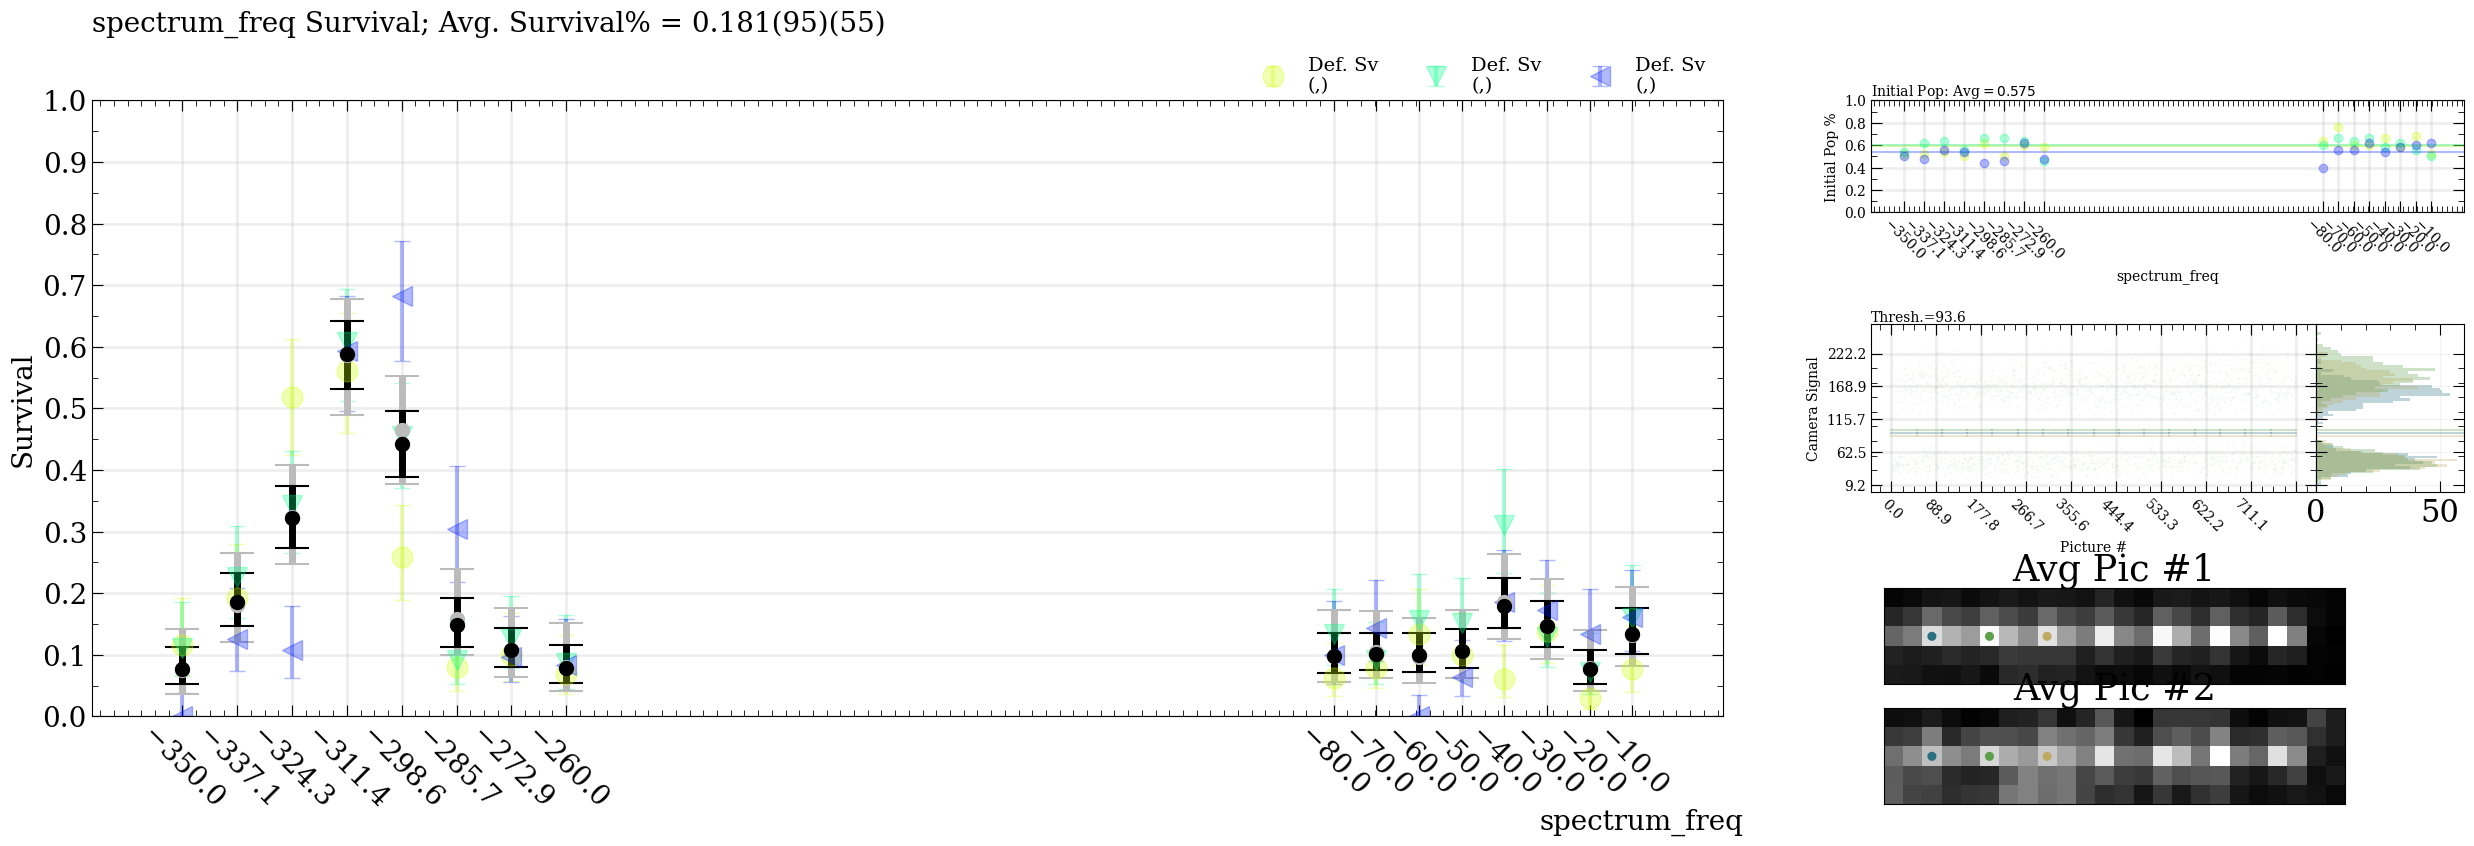

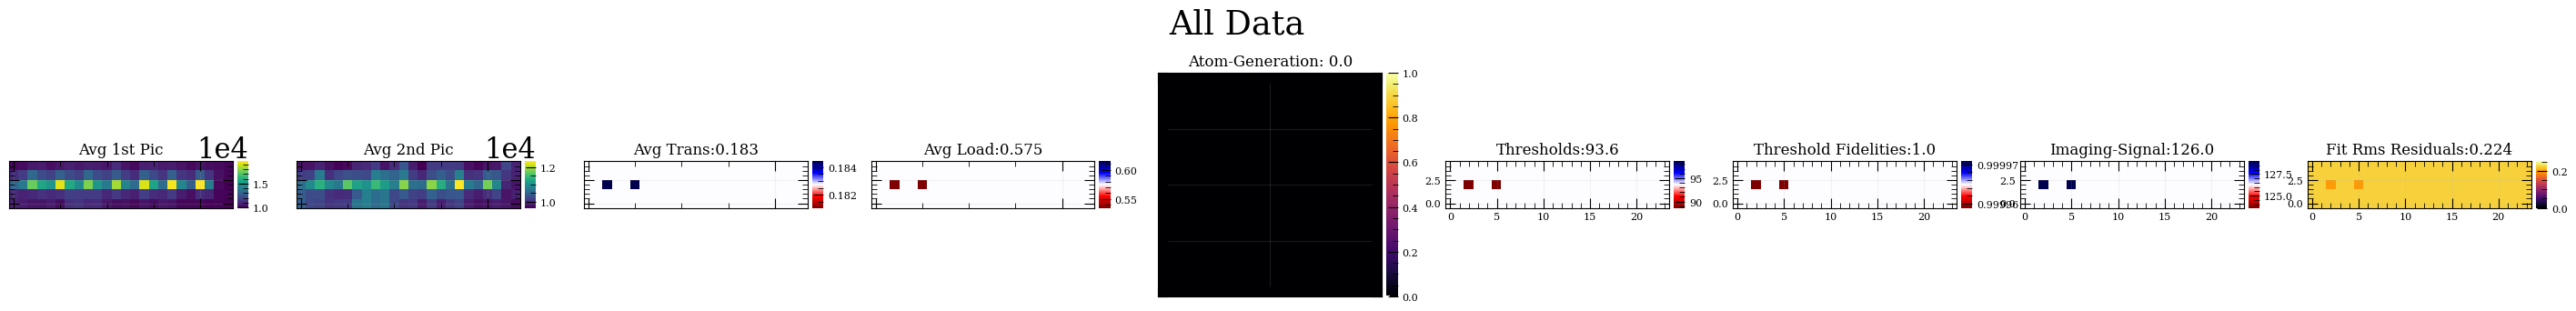

In [6]:
# atomlocs = [2,11,0,1,1]
atomlocs = [2,2,3,3,1]
reloadMyModules(29,'April')
mp.Survival(2, atomlocs);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency =  136.3063063063063


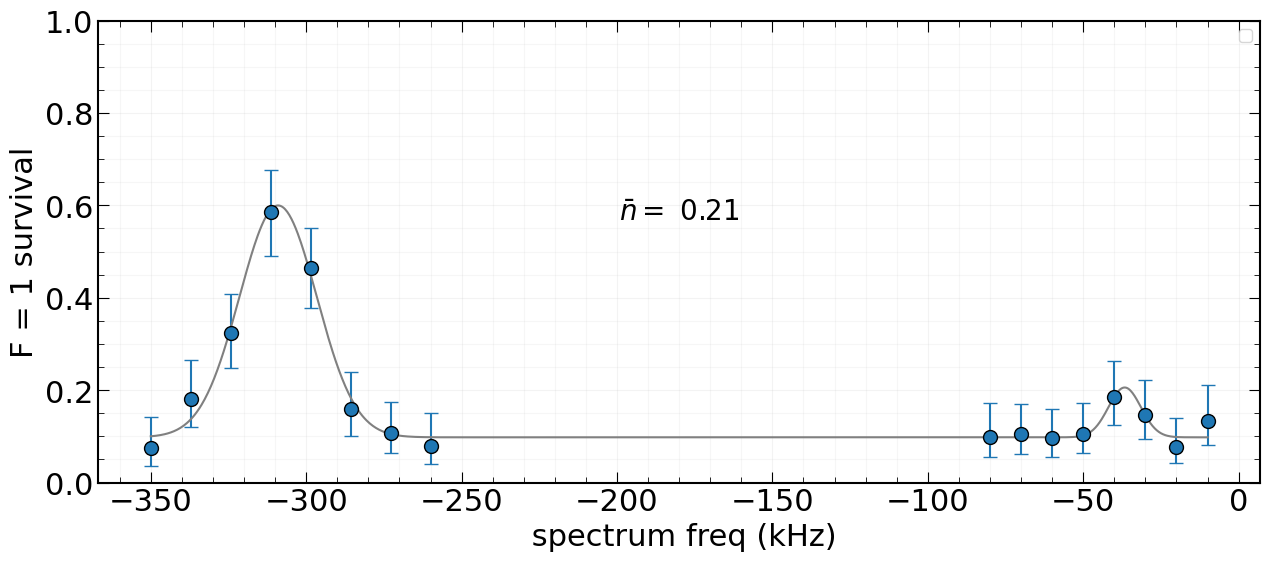

In [9]:
reloadMyModules(29,'April')
fileId = 2
dataset1 = ta.standardTransferAnalysis(fileId, tao.getStandardSurvivalOptions([2,2,3,3,1]));
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]   

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6));

x_data = key1
y_data = avgTferData1
ax.errorbar(x_data,y_data, yerr=err1,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5)

initial_guess = [0.8, -300, 20, 0.5, -30, 20,.1]
popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = double_gaussian(x_fit, *popt)

plt.plot(x_fit, y_fit, color='grey' )

# Add the text to the plot
plt.text((max(x_data) + min(x_data)) / 2, max(y_data), fr'$\bar n =$ {popt[3]/popt[0]:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=20)

ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
# plt.xlim(0,.02)
plt.ylabel('F = 1 survival')
plt.xlabel(' spectrum freq (kHz)')
plt.rcParams["axes.linewidth"] = 1.5
max_y_index = np.argmax(y_fit)
max_x_value = x_fit[max_y_index]
# print(max_x_value)

x_min = -150
x_max = 50

# Find the indices corresponding to the specified range of x values
indices = np.where((x_fit >= x_min) & (x_fit <= x_max))

# Slice the x and y arrays to include only the desired range
x_range = x_fit[indices]
y_range = y_fit[indices]
max_y_index = np.argmax(y_range)
max_x_value2 = x_range[max_y_index]
print('frequency = ', (abs(max_x_value)-abs(max_x_value2))/2)

### File 4 (3DGSBC_Top_Sideband_Spectroscopy):  

Number of Pictures: 4000; Picture Dimensions: 5 x 24
Variations: 20;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 8:56:35: on (Y-M-D) 2024-4-29, And ended at 9:11:7: on 2024-4-29
Experiment Notes:  



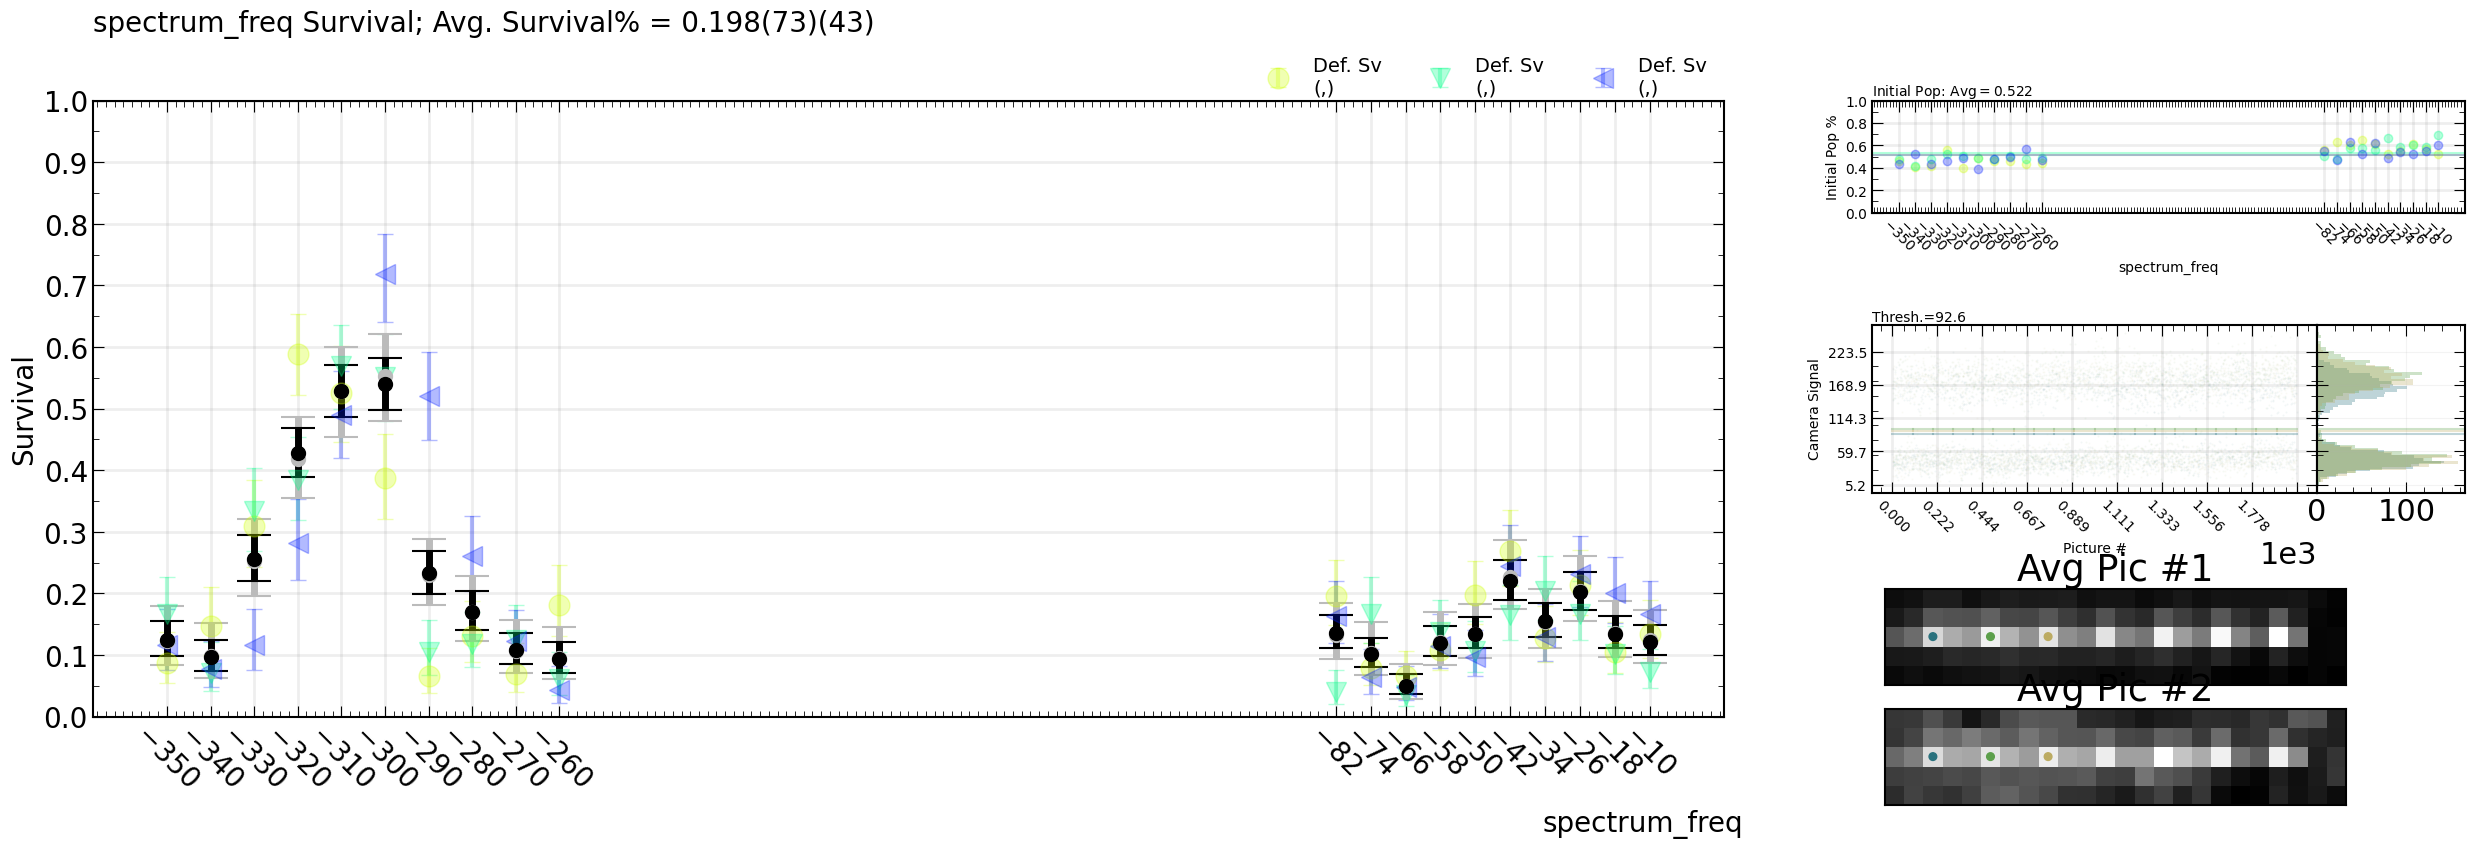

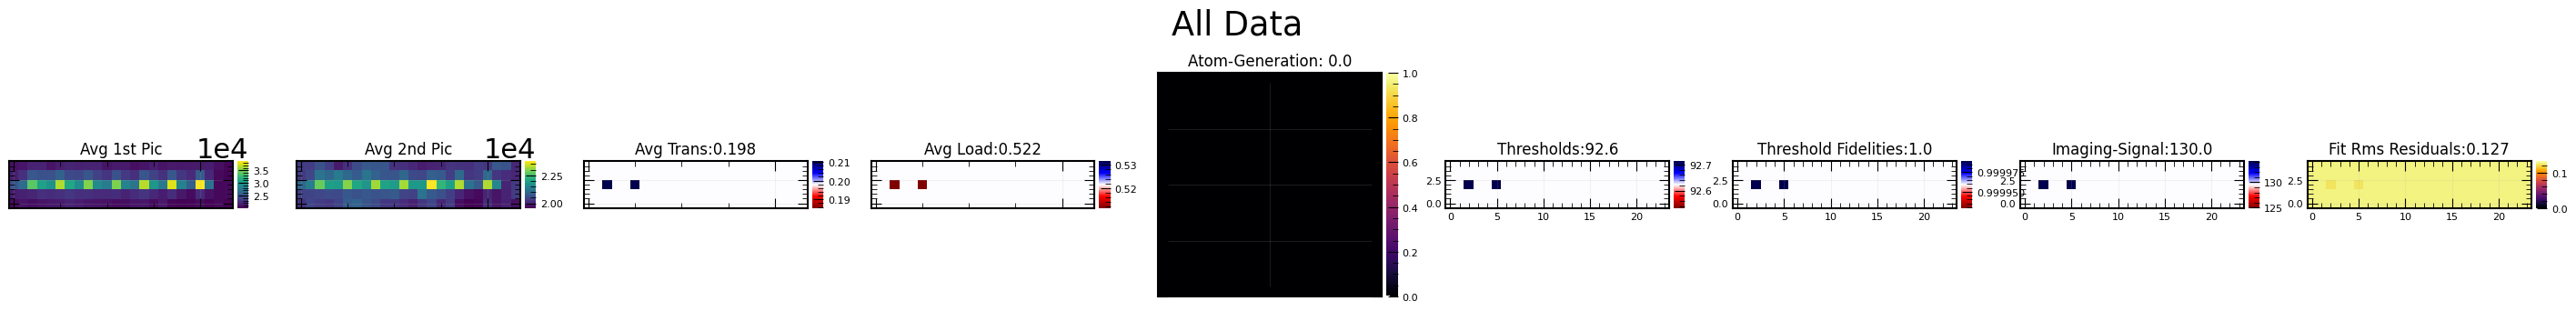

In [12]:
# atomlocs = [2,11,0,1,1]
atomlocs = [2,2,3,3,1]
reloadMyModules(29,'April')
mp.Survival(4, atomlocs);

### File 6 (3DGSBC_Top_Sideband_Spectroscopy):  

Number of Pictures: 4000; Picture Dimensions: 5 x 24
Variations: 20;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 13:43:33: on (Y-M-D) 2024-4-29, And ended at 13:58:7: on 2024-4-29
Experiment Notes:  



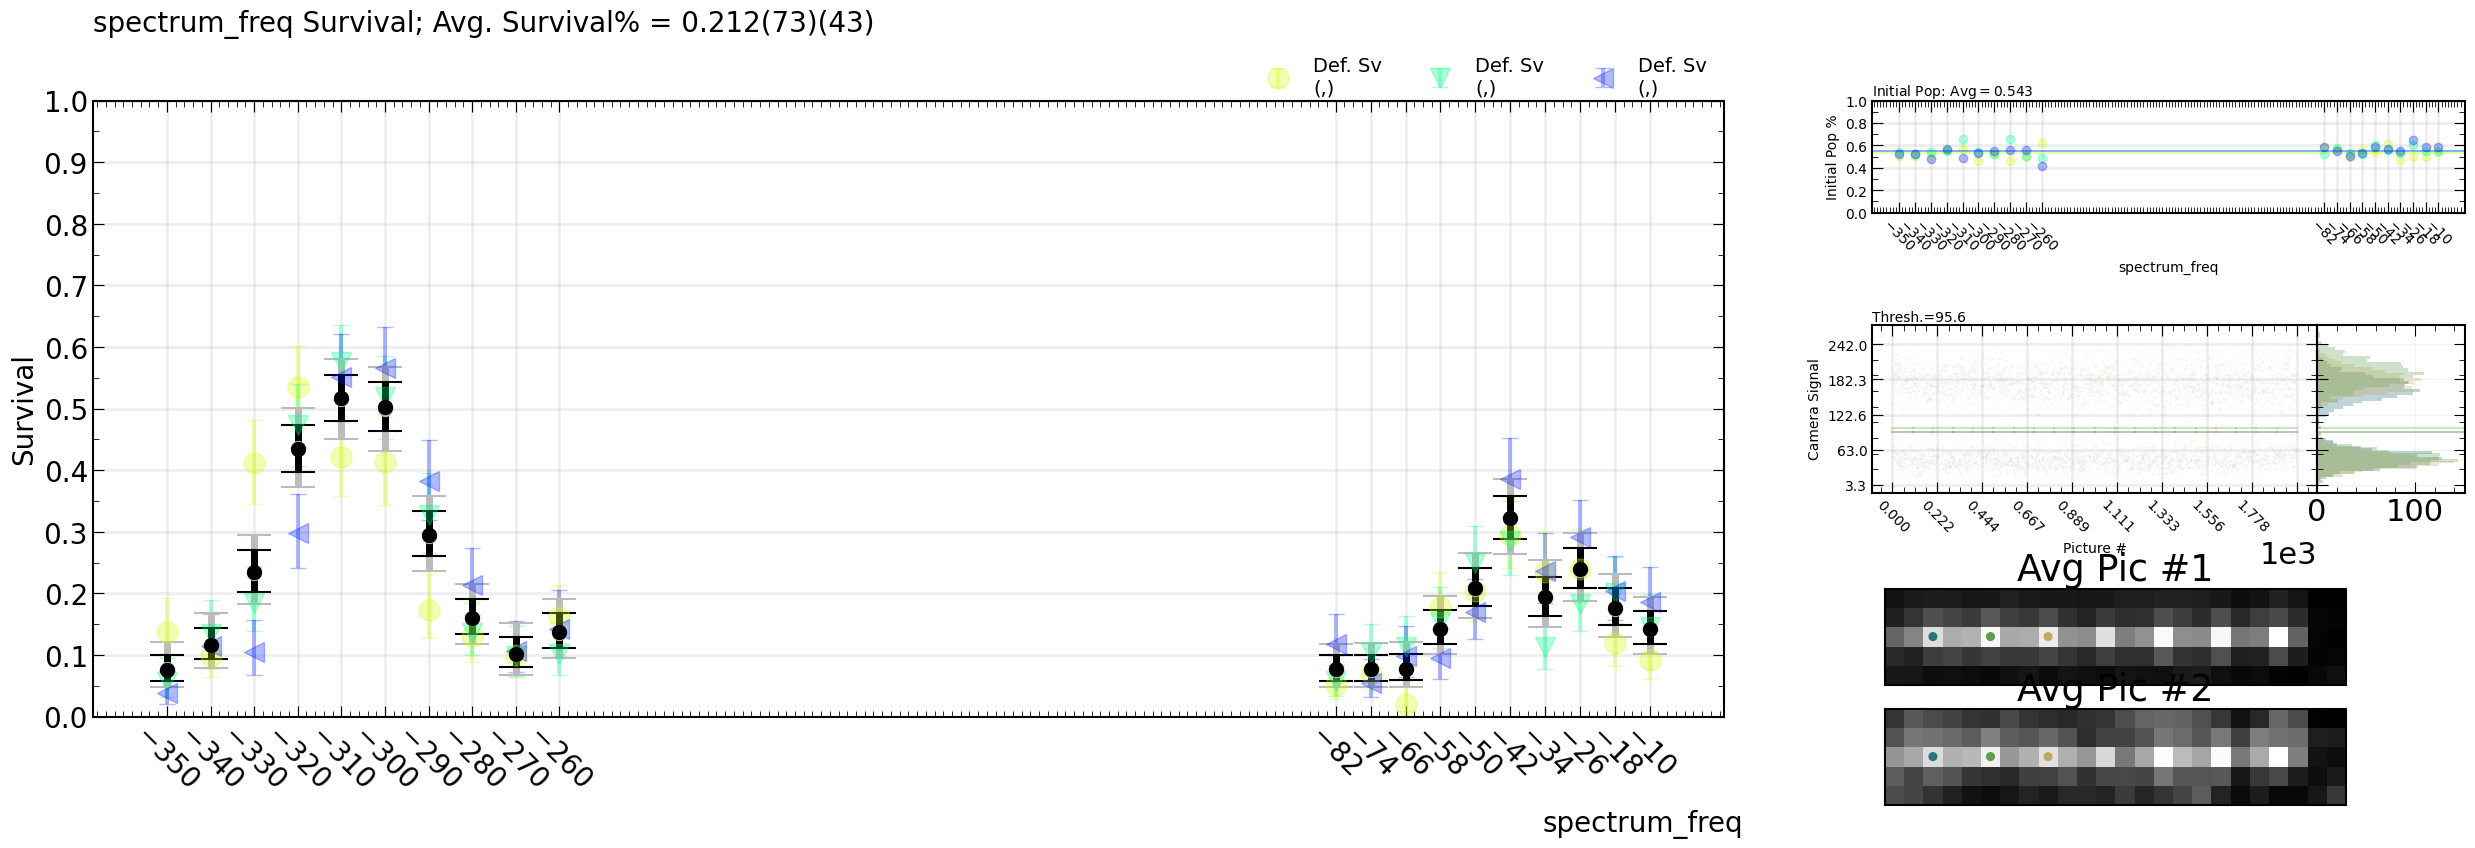

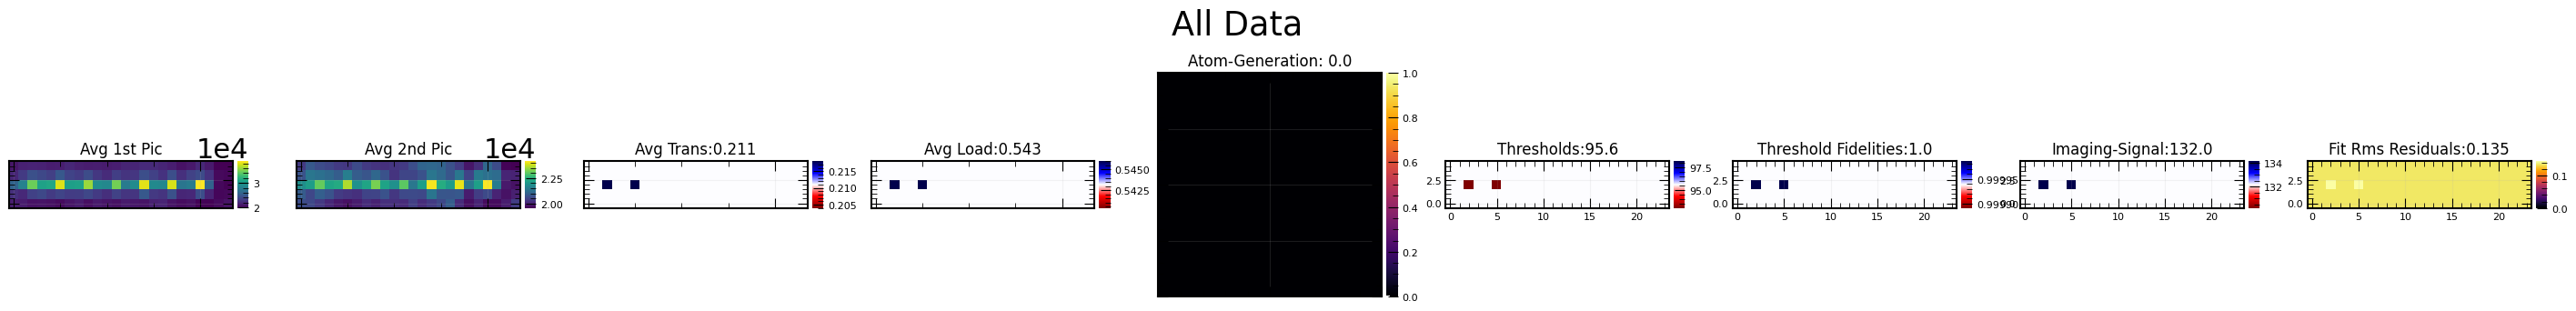

In [16]:
# atomlocs = [2,11,0,1,1]
atomlocs = [2,2,3,3,1]
reloadMyModules(29,'April')
mp.Survival(6, atomlocs);

### File 7 (3DGSBC_Top_Sideband_Spectroscopy):  

Number of Pictures: 4000; Picture Dimensions: 5 x 24
Variations: 20;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 14:0:19: on (Y-M-D) 2024-4-29, And ended at 14:14:51: on 2024-4-29
Experiment Notes:  



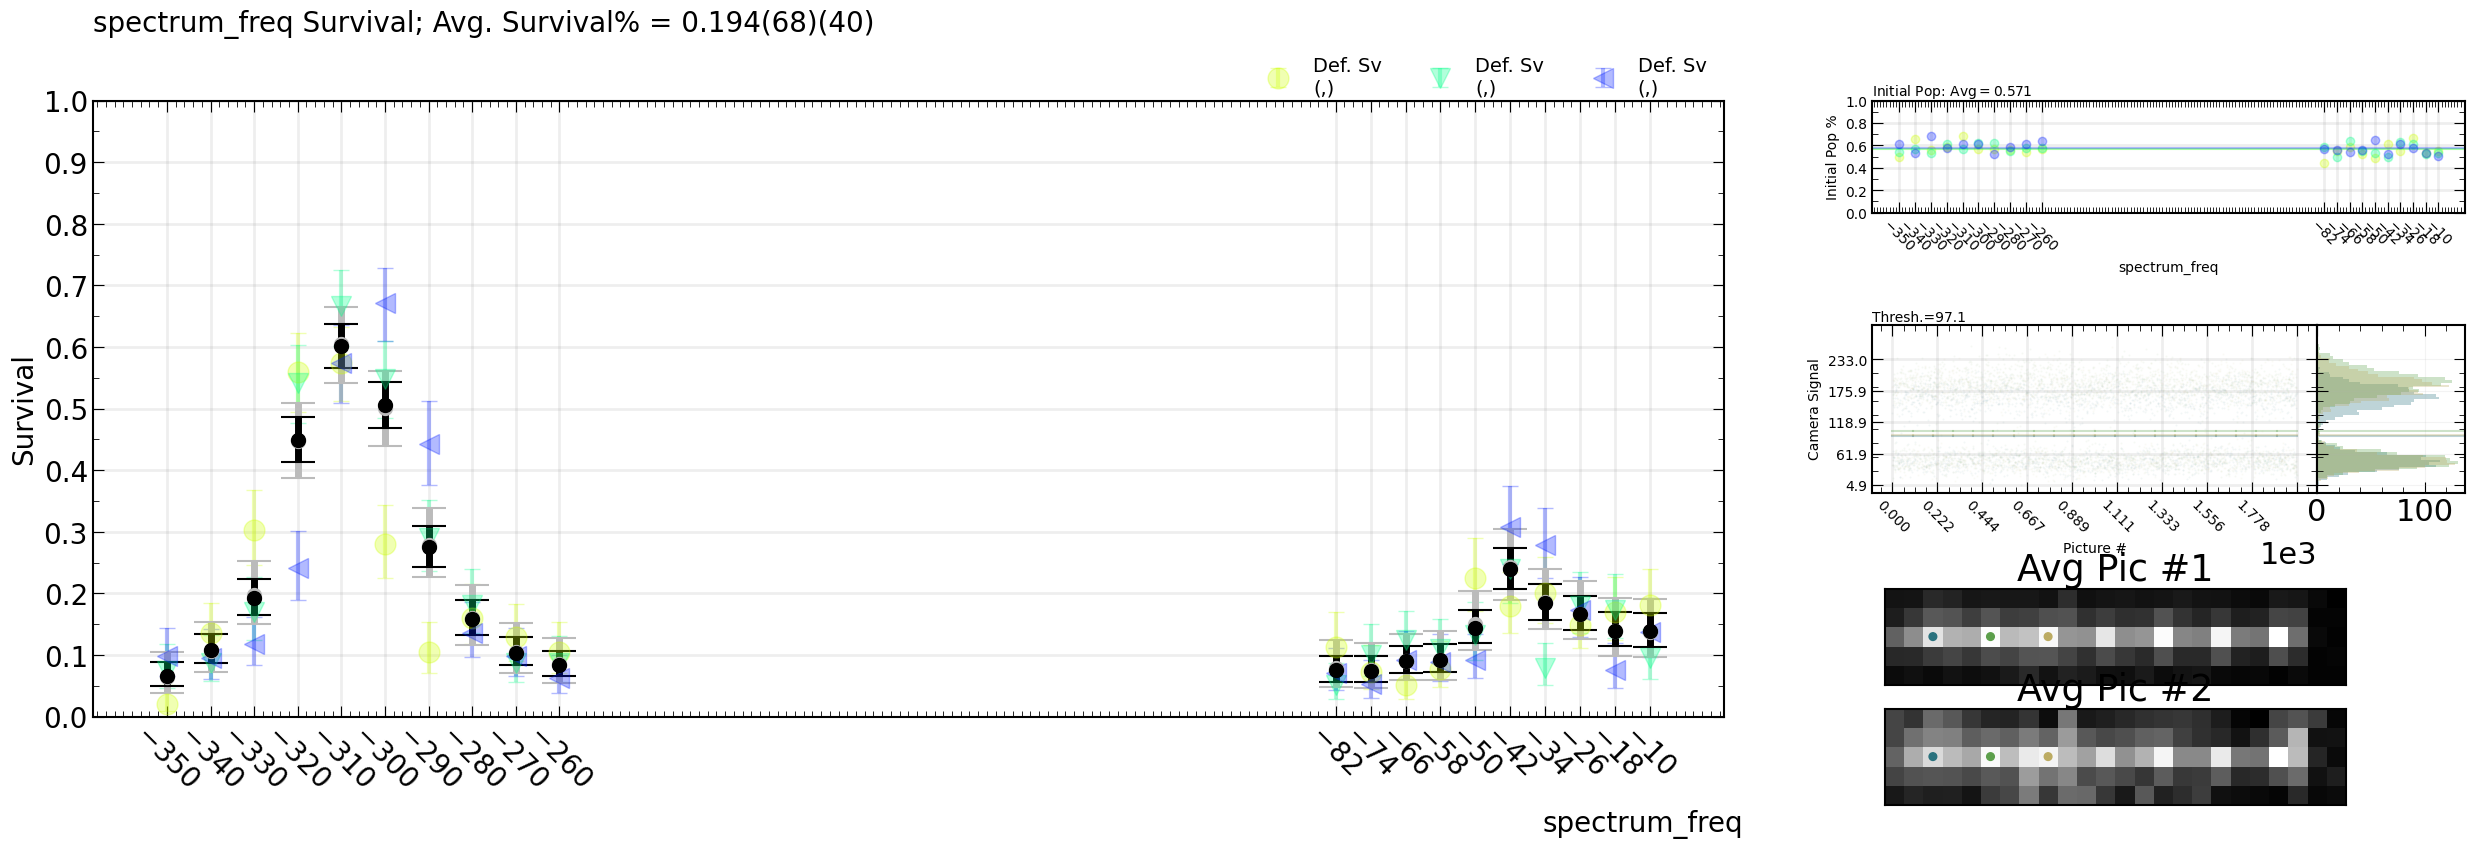

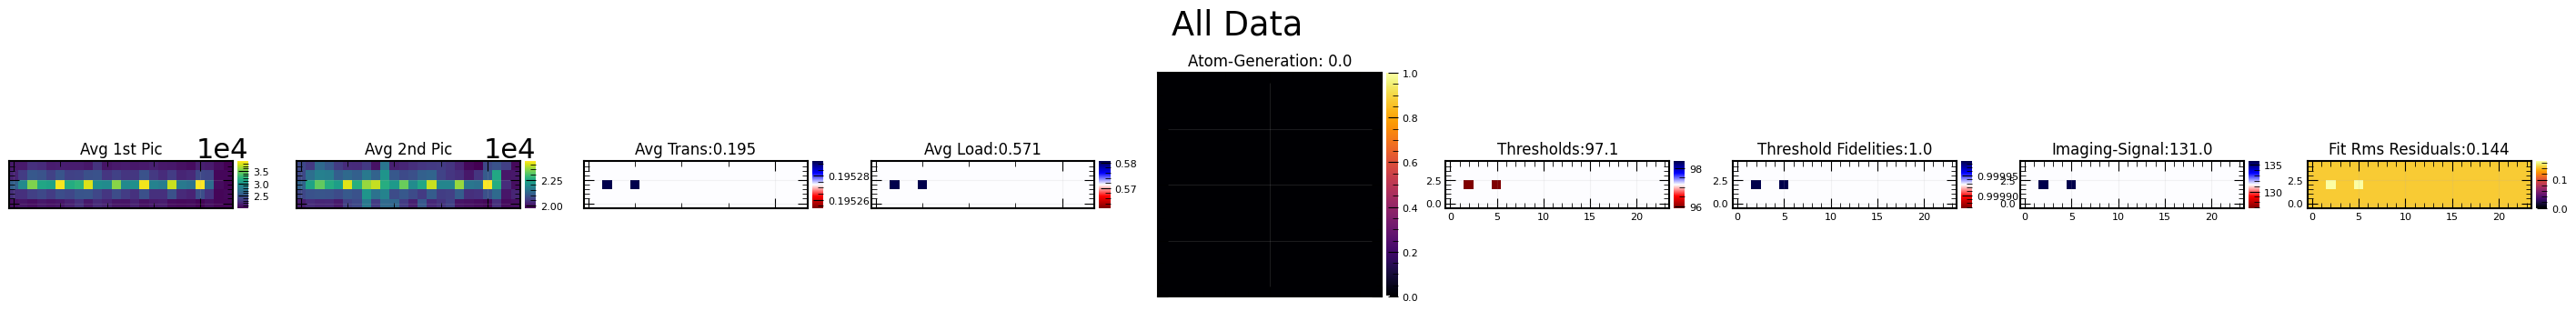

In [17]:
# atomlocs = [2,11,0,1,1]
atomlocs = [2,2,3,3,1]
reloadMyModules(29,'April')
mp.Survival(7, atomlocs);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


frequency =  137.15715715715714


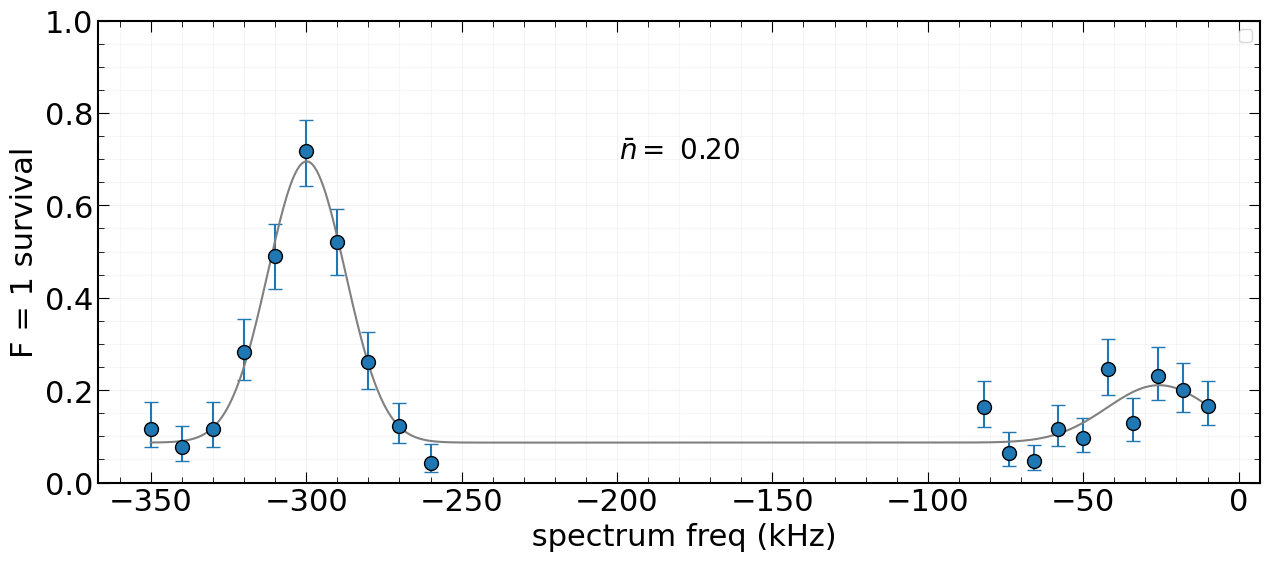

In [14]:
reloadMyModules(29,'April')
fileId = 4
dataset1 = ta.standardTransferAnalysis(fileId, tao.getStandardSurvivalOptions([2,2,3,3,1]));
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]   

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 6));

x_data = key1
y_data = avgTferData1
ax.errorbar(x_data,y_data, yerr=err1,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5)

initial_guess = [0.8, -300, 20, 0.5, -30, 20,.1]
popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 1000)
y_fit = double_gaussian(x_fit, *popt)

plt.plot(x_fit, y_fit, color='grey' )

# Add the text to the plot
plt.text((max(x_data) + min(x_data)) / 2, max(y_data), fr'$\bar n =$ {popt[3]/popt[0]:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=20)

ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
# plt.xlim(0,.02)
plt.ylabel('F = 1 survival')
plt.xlabel(' spectrum freq (kHz)')
plt.rcParams["axes.linewidth"] = 1.5
max_y_index = np.argmax(y_fit)
max_x_value = x_fit[max_y_index]
# print(max_x_value)

x_min = -150
x_max = 50

# Find the indices corresponding to the specified range of x values
indices = np.where((x_fit >= x_min) & (x_fit <= x_max))

# Slice the x and y arrays to include only the desired range
x_range = x_fit[indices]
y_range = y_fit[indices]
max_y_index = np.argmax(y_range)
max_x_value2 = x_range[max_y_index]
print('frequency = ', (abs(max_x_value)-abs(max_x_value2))/2)